# HW5

The goal of this HW is to use decision trees to find what made it more or less likely to survive the Titanic sinking in 1912.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


** You may need to install pydotplus package into Anaconda yourself **

## Q1, Cleaning (1 pt)

You need to start by cleaning the data set. 

In [47]:
df = pd.read_csv("titanic.csv")

After careful review, let's remove the 'Name', 'Ticket', 'PassengerId', 'Cabin' column 

In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
df.drop(columns={'Name', 'Ticket', 'PassengerId', 'Cabin'},inplace=True)

In [50]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Binarize gender and drop the redundent column 'Sex'

In [51]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [52]:
df['Male']=df['Sex'].apply(lambda x: 1 if x=='male' else 0 )

In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [54]:
df.drop(columns='Sex',inplace=True)

Make dummy variables for port of origin

In [55]:
df=pd.get_dummies(df, columns=['Embarked'])

In [56]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


Remove the nulls/NaN

In [57]:
df.isna().any()

Survived      False
Pclass        False
Age            True
SibSp         False
Parch         False
Fare          False
Male          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [58]:
df=df.dropna()
df.isna().any()

Survived      False
Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Male          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [59]:
df.isnull().any()

Survived      False
Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Male          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [60]:
df.shape

(714, 10)

** Make sure your data frame now is (714, 10) by using df.shape**

## Data set description
After cleaning, we have a DataFrame df, which reports the passengers of the Titanic (one row per passenger). The columns are:
<ul>
<li><b>Survived</b>: binary attribute that indicates whether the passenger survived. This is the dependent variable that we will attempt to explain
<li><b>Pclass</b>: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
<li><b>Age</b>: Passenger age
<li><b>SibSp</b>: The amout of the passenger's siblings/spouses aboard the Titanic
<li><b>Parch</b>: The amout of the passenger's parents/children aboard the Titanic
<li><b>Fare</b>: The ticket fare
<li><b>Male</b>: binary attibute that indicates the gender (1=Male, 0=Female)
<li><b>Embarked_C</b>: binary attibute that indicates whether the passenger embarked in Cherbourg
<li><b>Embarked_Q</b>: binary attibute that indicates whether the passenger embarked in Queenstown
<li><b>Embarked_S</b>: binary attibute that indicates whether the passenger embarked in Southampton
</ul>

### Question 2 (1 pt)

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 1</b> (i.e., one root and two leaf nodes) to find the differences between those who survived and those who didn't. 

In [71]:
dt = tree.DecisionTreeClassifier(max_depth=1)

In [62]:
X = df.drop('Survived',axis=1)

In [70]:
Y=df.Survived

In [75]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\pawar\\Anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz'

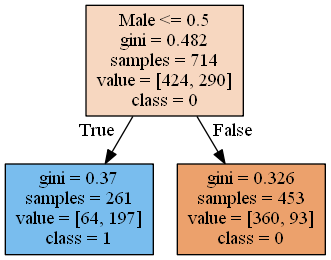

In [80]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Question 3 (1 pt)

Explain this decision tree each node's information. Write your answer in a markdown cell.

Total Sample data 714 gets distributed depending on the variable 'Survived'.
First node indicates,more number of person died i.e. 424 thats whay class variable is showing 0.
Second node,i.e. blue one indicates Out of 261 Females,197 surivied and 64 died thats why class variable is showing 1.
Third node,i.e. orange one indicates out of 453 males, only 93 males survived and 360 died thats why class variable is showing 0.
Hence the survival number of females are greater in comparision to males in Titanic sink. 

### Question 4 (1 pt)

In <u>at most 10 words</u>, explain what the decision tree tells us. Write your answer in a markdown cell.

Number of females survival are greater in comparision to males.

### Question 5 (1 pt)

Use <b>one</b> seaborn chart to <b>statistically</b> validate what you found in the previous question. <b>Use only one Jupyter cell</b>.

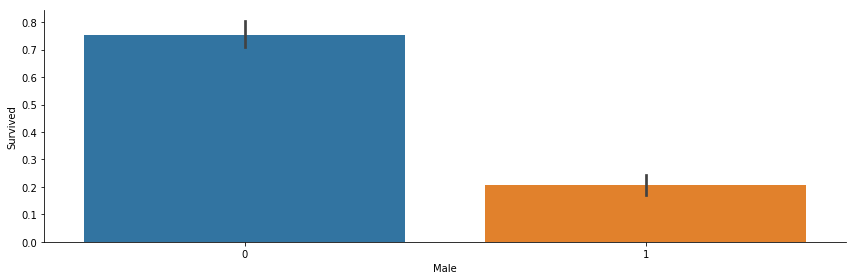

In [91]:
sns.factorplot(y='Survived', data=df,x='Male',aspect=3,kind='bar')

### Question 6 (1 pt)

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 2</b> to find the differences between those who survived and those who didn't. Your tree should have four leaves.

In [81]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [82]:
X = df.drop('Survived',axis=1)

In [83]:
Y=df.Survived

In [84]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

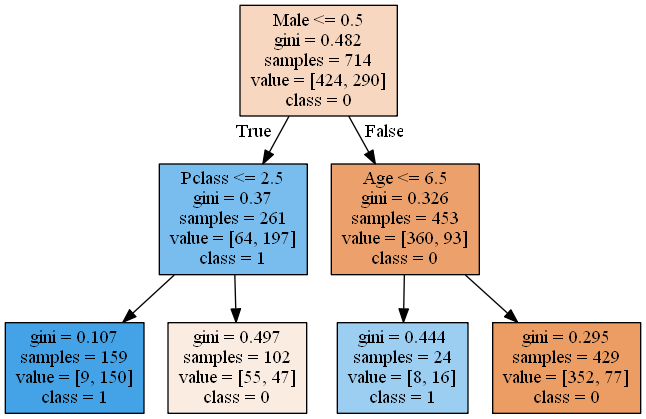

In [85]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Question 7 (3 pts)

The tree found in your previous question should involve three predictors. Guided from what the tree tells you, detect an interesting finding involving <b>two</b> of these three predictors and show its validity through seaborn. 
<p><b>Format and grading:</b> The first cell following this cell must be a markdown cell with your finding written in English. The second cell must contain the code that builds a seaborn chart: this chart must <b>statistically</b> validate your finding. You should have ** two ** findings. One is from the right side of the tree, the other is from the left side of the tree.

### First solution (right side of tree) (1.5 pts)

The right side of the tree indicates that more males(ages 6.5 or less) survived in the Titanic as 
comapred to the males 6.5 years older.

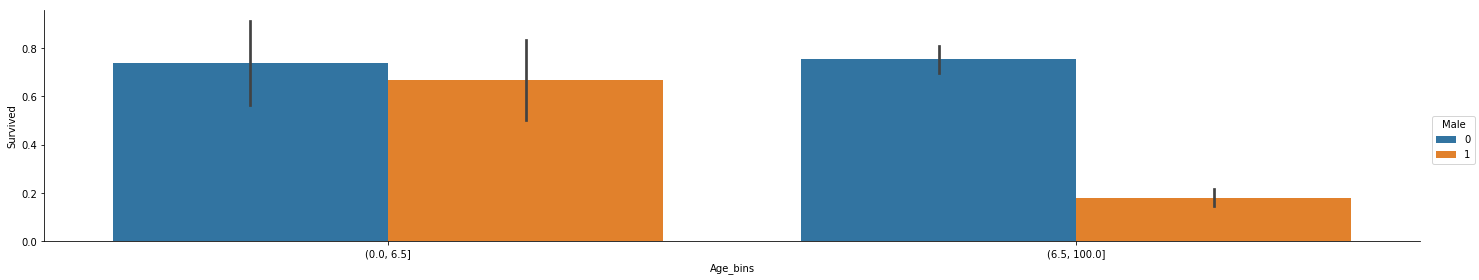

In [130]:
df2=df.copy()
df2['Age_bins']=pd.cut(df2.Age, bins=[0,6.5,100])
sns.factorplot(y='Survived', data=df2,x='Age_bins',hue='Male',aspect=5,kind='bar')

### Second solution (left side of tree) (1.5 pts)

The left side of the tree indicates that more 1st and 2nd class females had surived as 
compared to the 3rd class women in Titanic sinking.

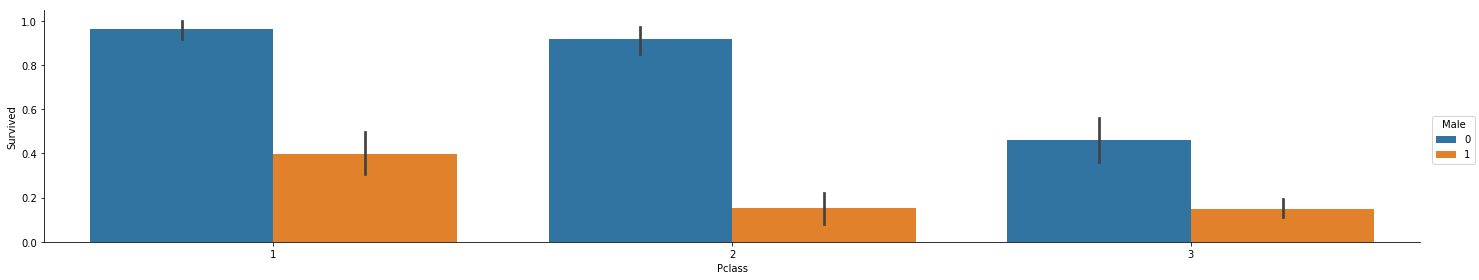

In [131]:
sns.factorplot(y='Survived', data=df,x='Pclass',hue='Male',aspect=5,kind='bar')